## Pre lecture

# Question 1

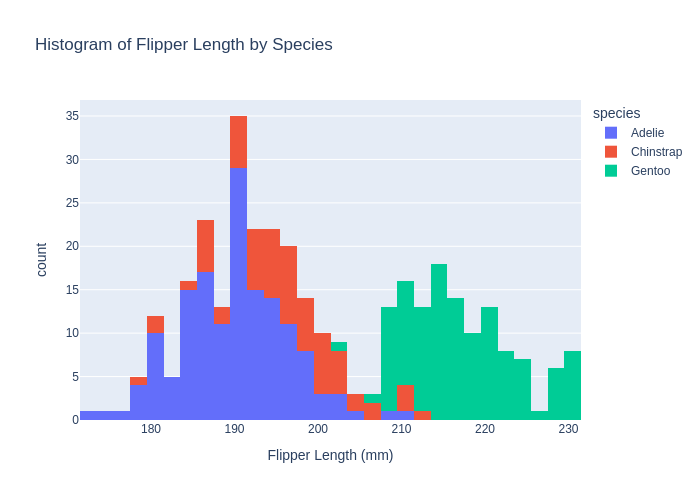

In [1]:
import pandas as pd
import plotly.express as px

url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv'
penguins = pd.read_csv(url)

fig = px.histogram(penguins, 
                   x='flipper_length_mm', 
                   color='species',  # Differentiate by species
                   nbins=30,  # Number of bins in the histogram
                   title='Histogram of Flipper Length by Species',
                   labels={'flipper_length_mm':'Flipper Length (mm)'}
                  )

fig.show(renderer="png")


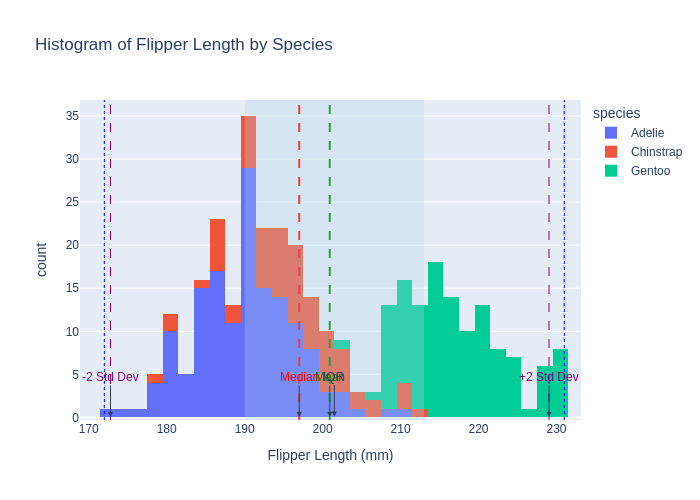

In [2]:
import plotly.graph_objects as go 

penguins = penguins.dropna(subset=['flipper_length_mm'])

mean_value = penguins['flipper_length_mm'].mean()
median_value = penguins['flipper_length_mm'].median()
std_value = penguins['flipper_length_mm'].std()
min_value = penguins['flipper_length_mm'].min()
max_value = penguins['flipper_length_mm'].max()
q1 = penguins['flipper_length_mm'].quantile(0.25)
q3 = penguins['flipper_length_mm'].quantile(0.75)

fig.add_vline(x=mean_value, line_width=2, line_dash="dash", line_color="green")
fig.add_annotation(x=mean_value, y=0.05, text="Mean", showarrow=True, arrowhead=2, ax=0, ay=-40, font=dict(color="green"))

fig.add_vline(x=median_value, line_width=2, line_dash="dash", line_color="red")
fig.add_annotation(x=median_value, y=0.05, text="Median", showarrow=True, arrowhead=2, ax=0, ay=-40, font=dict(color="red"))

fig.add_vline(x=min_value, line_width=1, line_dash="dot", line_color="blue")
fig.add_vline(x=max_value, line_width=1, line_dash="dot", line_color="blue")

fig.add_vline(x=mean_value - 2*std_value, line_width=1, line_dash="dash", line_color="purple")
fig.add_annotation(x=mean_value - 2*std_value, y=0.05, text="-2 Std Dev", showarrow=True, arrowhead=2, ax=0, ay=-40, font=dict(color="purple"))

fig.add_vline(x=mean_value + 2*std_value, line_width=1, line_dash="dash", line_color="purple")
fig.add_annotation(x=mean_value + 2*std_value, y=0.05, text="+2 Std Dev", showarrow=True, arrowhead=2, ax=0, ay=-40, font=dict(color="purple"))

fig.add_shape(type="rect", 
              x0=q1, x1=q3, 
              y0=0, y1=1,  # This covers the full y-range
              yref="paper",  # Set y-reference to 'paper' to stretch the full height of the plot
              fillcolor="lightblue", opacity=0.3, line_width=0)

fig.add_annotation(x=(q1 + q3) / 2, y=0.1, text="IQR", showarrow=True, arrowhead=2, ax=0, ay=-40)

fig.show(renderer="png")


# Question 2

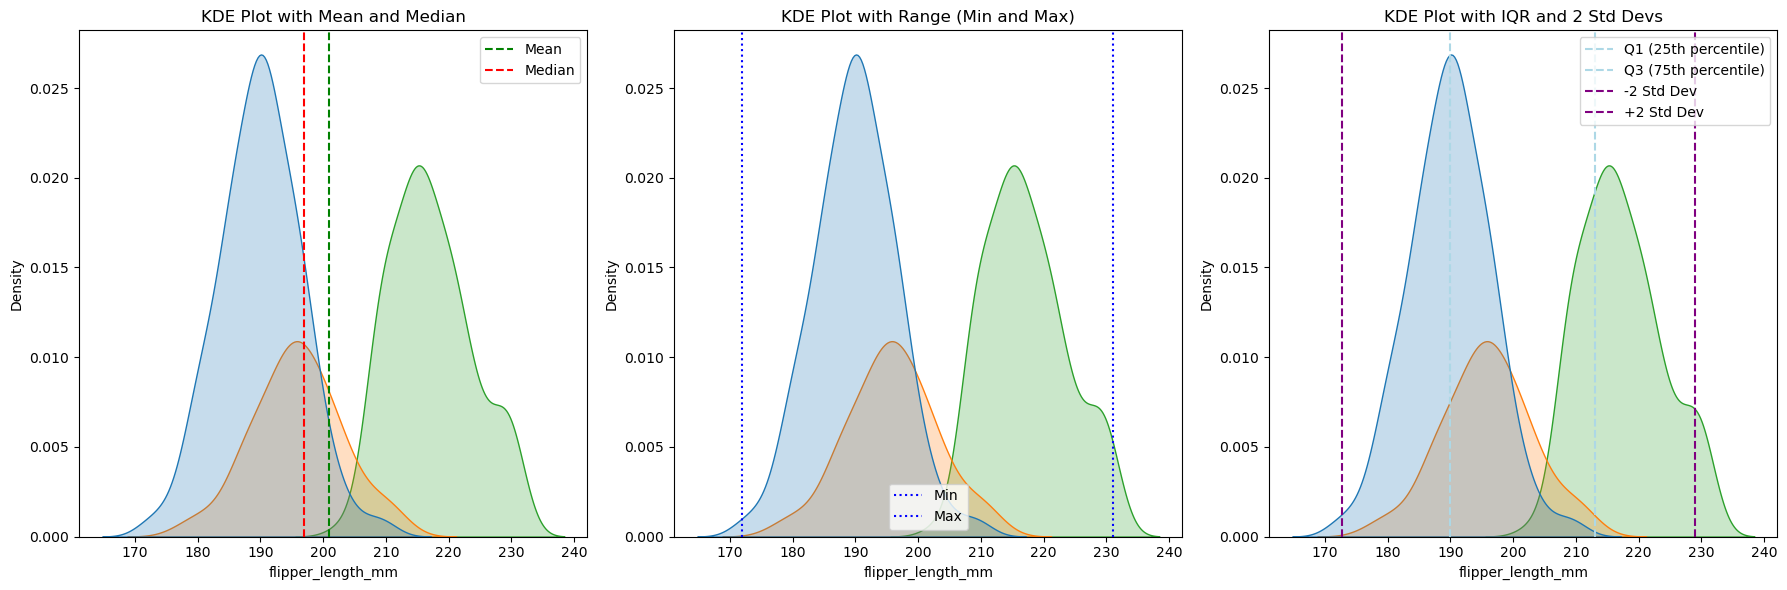

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 1. KDE plot with mean and median
sns.kdeplot(data=penguins, x='flipper_length_mm', hue='species', ax=axes[0], fill=True)
axes[0].axvline(mean_value, color='green', linestyle='--', label='Mean')
axes[0].axvline(median_value, color='red', linestyle='--', label='Median')
axes[0].set_title('KDE Plot with Mean and Median')
axes[0].legend()

# 2. KDE plot with range (min and max)
sns.kdeplot(data=penguins, x='flipper_length_mm', hue='species', ax=axes[1], fill=True)
axes[1].axvline(min_value, color='blue', linestyle=':', label='Min')
axes[1].axvline(max_value, color='blue', linestyle=':', label='Max')
axes[1].set_title('KDE Plot with Range (Min and Max)')
axes[1].legend()

# 3. KDE plot with IQR and standard deviations
sns.kdeplot(data=penguins, x='flipper_length_mm', hue='species', ax=axes[2], fill=True)
axes[2].axvline(q1, color='lightblue', linestyle='--', label='Q1 (25th percentile)')
axes[2].axvline(q3, color='lightblue', linestyle='--', label='Q3 (75th percentile)')
axes[2].axvline(mean_value - 2*std_value, color='purple', linestyle='--', label='-2 Std Dev')
axes[2].axvline(mean_value + 2*std_value, color='purple', linestyle='--', label='+2 Std Dev')
axes[2].set_title('KDE Plot with IQR and 2 Std Devs')
axes[2].legend()

plt.tight_layout()
plt.show()

In [4]:
from IPython.display import Image, display
display(Image(filename='penguins_kde_plots.png'))

### Summary:


### Summary of Interactions

1. **Penguins Dataset Visualization**:
   - You asked how to create a Plotly histogram for `flipper_length_mm` for each species in the penguins dataset.
   - I provided a code snippet to generate a Plotly histogram with the required specifications.

2. **Plotly Enhancements**:
   - You inquired about marking the mean and median on the histogram and using shapes to indicate scale metrics (range, interquartile range, and standard deviations).
   - I provided a modified code snippet that used Plotly to achieve this with vertical lines and shapes.

3. **Seaborn KDE Plots**:
   - You requested a similar analysis using Seaborn's `kdeplot`, organized into a row of three plots showing mean, range, and interquartile ranges.
   - I provided a complete code snippet to create these plots using Seaborn.

4. **Figure Submission**:
   - You asked whether `fig.show()` should be replaced with a `renderer` parameter for submissions.
   - I explained how to save figures using `plt.savefig()` for submission purposes.

5. **Submission to GitHub and MarkUs**:
   - You requested guidance on how to submit your project, including code and figures, to GitHub and MarkUs.
   - I provided step-by-step instructions for creating a GitHub repository, adding files, committing changes, and submitting on MarkUs.

6. **Embedding PNG in Code**:
   - You asked if you could directly include the PNG file in your code.
   - I explained how to embed the image in Markdown for a README file or display it in a Jupyter Notebook.



### Link:

https://chatgpt.com/share/66f089f9-3264-8010-8dfd-18c30b944da1

# Question 3

**Descriptions:**

Box plots are a graphical representation of both the central tendency and the variability of a single variable dataset. They are constracted from median, upper whisker, lower whisker, 1st quartile, and 3rd quartile. 

Histograms are similar to bar graphs with continuous (attached) boxes and always have frequency (or relative frequency) on the vertical axis. Histograms are usually used with larger datasets (100+ data points). Data on the x-axis is collapsed into a number of intervals / bins. These graphs give a visual for shape, center, and spread of the dataset.

Kernal density estimators are smoothed curves that estimate the probability density function of a data set. They provide a continuous estimate of the distribution and are an alternative to histograms, avoiding the need for binning.

Box plots seem a bit more primitive than histograms or KDEs, but it can be a useful tool to do a quick graphical examination on one or more data sets. Differently, histograms and KDEs show the shape of the distribution. The overall structure of histograms and kernel density estimate can be strongly influenced by the choice of number and width of bins techniques and the choice of bandwidth, respectively. 

**Preference:**

I prefer box plots because they are a straightforward, efficient presentation format for visualization of key summary statistics. They require no assumptions about underlying distribution shape. Box plots become very useful when trying to identify outliers, or when comparing multiple data sets side by side, where they give a more compact presentation than provided by histograms or KDEs. Box plots further avoid problems with binning that arise with histograms and are therefore not as sensitive to arbitrary choices distorting the interpretation of the data. Box plots provide also an advantage for big datasets, by condensing information into a few key points, giving a clear view of the spread and central tendency of the distribution.

### Summary:

Here’s a concise summary of our exchanges for your homework assignment:

---

**Discussion Topic**: Comparison of data distribution visualization methods: **Box Plots**, **Histograms**, and **Kernel Density Estimators (KDEs)**.

### **1. Initial Descriptions and Agreement:**
- **Box Plots**: 
  - Described as graphical tools representing the central tendency and variability of a dataset.
  - Constructed from the median, whiskers, 1st quartile, and 3rd quartile.
  - Useful for quick comparisons but don’t display the detailed shape of the distribution.
  
- **Histograms**:
  - Defined as bar-like graphs with continuous bins, typically used for larger datasets (100+ points).
  - Provide insight into the shape, center, and spread of the data.
  - The number of bins strongly influences the result.

- **KDEs**:
  - Described as smoothed curves that estimate the probability density function.
  - They offer a continuous estimate of the distribution, avoiding the need for binning, but are sensitive to bandwidth choices.
  
I agreed with your descriptions and highlighted that each method serves different purposes, with box plots being more primitive but still valuable for certain analyses, while histograms and KDEs offer more detail on distribution shape.

### **2. Pros and Cons Comparison**:

#### **Box Plots**:
- **Pros**: Summarizes key statistics, detects outliers, ideal for comparing datasets.
- **Cons**: Doesn’t show distribution shape, lacks frequency information.

#### **Histograms**:
- **Pros**: Visualizes distribution shape, shows frequency, easy to create and interpret.
- **Cons**: Sensitive to bin choice, can appear blocky, less effective for comparisons.

#### **KDEs**:
- **Pros**: Smooth, continuous distribution, no need for binning, shows fine distribution details.
- **Cons**: Sensitive to bandwidth, harder to interpret, less effective for small datasets.

### **3. Conclusion**:
- **Box Plots** provide quick summaries and are useful for basic comparisons.
- **Histograms** are intuitive and excellent for visualizing distribution, but binning must be carefully considered.
- **KDEs** offer more nuanced distribution estimates but require caution in selecting the smoothing parameter (bandwidth).



### Link:

https://chatgpt.com/share/66f0b383-205c-8010-bb2e-fe681d0ae854

# Question 4

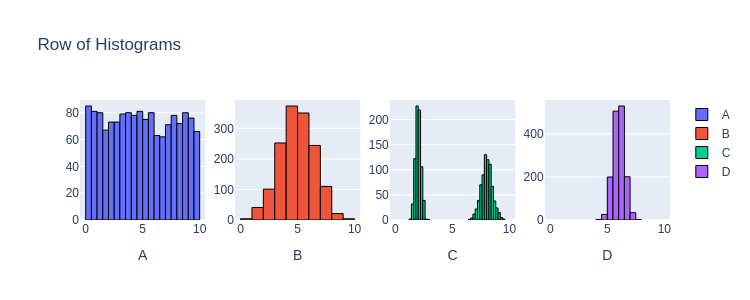

In [5]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

In [6]:
import numpy as np

means = [np.mean(data1), np.mean(data2), np.mean(data3), np.mean(data4)]
std_devs = [np.std(data1, ddof=1), np.std(data2, ddof=1), np.std(data3, ddof=1), np.std(data4, ddof=1)]

similar_means = []
similar_means_diff_vars = []
similar_vars_diff_means = []
different_means_vars = []

for i in range(len(means)):
    for j in range(i + 1, len(means)):
        mean_diff = abs(means[i] - means[j])
        var_diff = abs(std_devs[i] - std_devs[j])

        mean_threshold = 0.1 * max(means[i], means[j])  
        var_threshold = 0.1 * max(std_devs[i], std_devs[j])  

        if mean_diff < mean_threshold and var_diff < var_threshold:
            similar_means.append((i, j))
        elif mean_diff < mean_threshold:
            similar_means_diff_vars.append((i, j))
        elif var_diff < var_threshold:
            similar_vars_diff_means.append((i, j))
        else:
            different_means_vars.append((i, j))

        
datasets = [data1, data2, data3, data4]
dataset_names = ['data1', 'data2', 'data3', 'data4']

for i, data in enumerate(datasets):
    mean = np.mean(data)
    variance = np.std(data, ddof=1)  # Use ddof=1 for sample standard deviation
    print(f"{dataset_names[i]}: Mean = {mean:.2f}, Variance = {variance:.2f}")

print("\n")
    
print("Datasets with similar means:", similar_means)
print("Datasets with similar means but different variances:", similar_means_diff_vars)
print("Datasets with similar variances but different means:", similar_vars_diff_means)
print("Datasets with different means and different variances:", different_means_vars)


data1: Mean = 4.90, Variance = 2.89
data2: Mean = 4.96, Variance = 1.51
data3: Mean = 5.01, Variance = 3.04
data4: Mean = 6.01, Variance = 0.50


Datasets with similar means: [(0, 2)]
Datasets with similar means but different variances: [(0, 1), (1, 2)]
Datasets with similar variances but different means: []
Datasets with different means and different variances: [(0, 3), (1, 3), (2, 3)]


### Which datasets have similar means and similar variances
Data 1 and data 3

### Which datasets have similar means but quite different variances
Data 1 and data 2
<br>(or data 2 and data 3)

### Which datasets have similar variances but quite different means
None applicable

### Which datasets have quite different means and quite different variances
Data 3 and data 4
<br>(or data 1 and data 4)
<br>(or data 2 and data 4)



## Post lecture

# Question 5

**Explanation in my own words:**
<br>
<br>Generally, mean and median are both measures of central tendency. Mean is the average of all the data points, it can be sensitive to outliers or extrame values. Differently, median is the middle value when the data points are arranged in order. 
<br>
<br>Right-skewed or left-skewed distribution occur when the mean differs from the median. In a right-skewed distribution, the tail on the right side (higher values) is longer or fatter than the left side. In a left-skewed distribution, the tail on the left side (lower values) is longer or fatter than the right side.

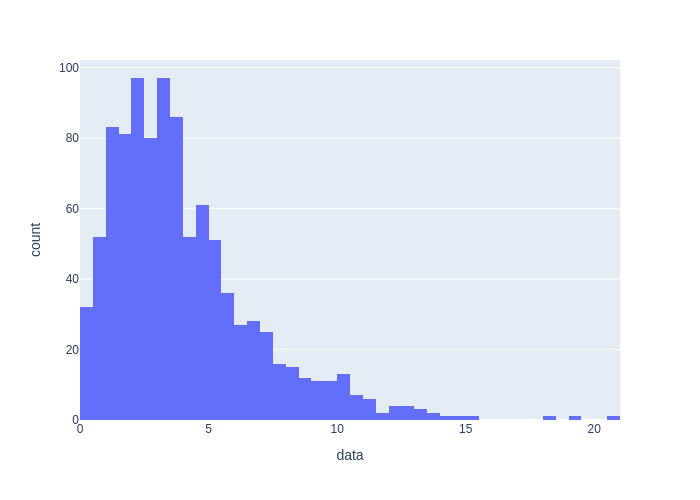

In [7]:
from scipy import stats
import pandas as pd
import numpy as np
  
sample1 = stats.gamma(a=2,scale=2).rvs(size=1000)
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")
# USE `fig1.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

sample1.mean()
np.quantile(sample1, [0.5]) # median

sample2 = -stats.gamma(a=2,scale=2).rvs(size=1000)

fig1.show(renderer="png")

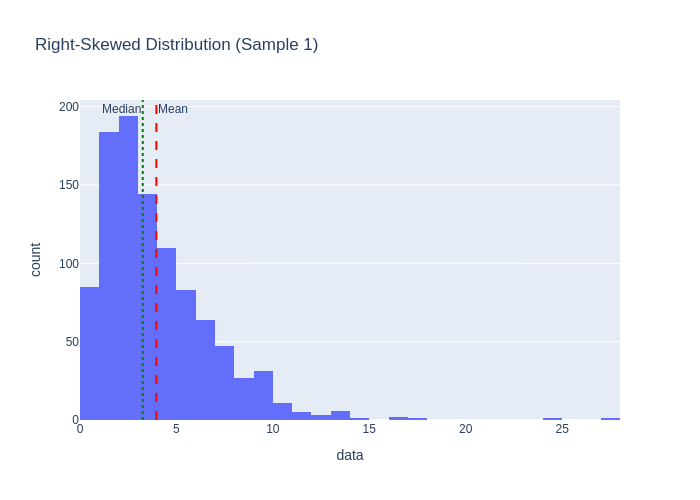

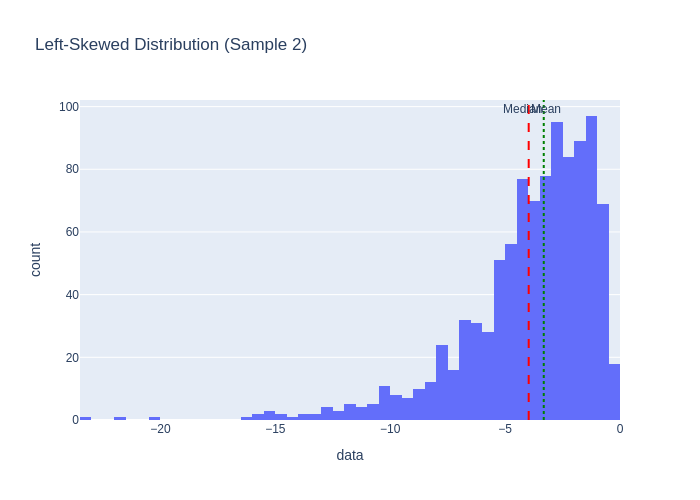

Right-Skewed Sample 1: Mean = 3.96, Median = 3.25
Left-Skewed Sample 2: Mean = -3.97, Median = -3.32


In [8]:
from scipy import stats
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

sample1 = stats.gamma(a=2, scale=2).rvs(size=1000)

sample2 = -stats.gamma(a=2, scale=2).rvs(size=1000)

mean1 = sample1.mean()
median1 = np.quantile(sample1, 0.5)

mean2 = sample2.mean()
median2 = np.quantile(sample2, 0.5)

fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data", nbins=50, title="Right-Skewed Distribution (Sample 1)")
fig2 = px.histogram(pd.DataFrame({'data': sample2}), x="data", nbins=50, title="Left-Skewed Distribution (Sample 2)")

fig1.add_vline(x=mean1, line_dash="dash", line_color="red", annotation_text="Mean", annotation_position="top right")
fig1.add_vline(x=median1, line_dash="dot", line_color="green", annotation_text="Median", annotation_position="top left")

fig2.add_vline(x=mean2, line_dash="dash", line_color="red", annotation_text="Mean", annotation_position="top right")
fig2.add_vline(x=median2, line_dash="dot", line_color="green", annotation_text="Median", annotation_position="top left")

fig1.show(renderer="png")
fig2.show(renderer="png")

print(f"Right-Skewed Sample 1: Mean = {mean1:.2f}, Median = {median1:.2f}")
print(f"Left-Skewed Sample 2: Mean = {mean2:.2f}, Median = {median2:.2f}")


#### Summary:

Here’s a summary of our exchanges on this topic:

---

### **Topic: Understanding the Relationship Between Mean, Median, and Skewness**

1. **Initial Explanation of Mean vs. Median**:
   - We discussed how the **mean** is the average of all data points, while the **median** is the middle value when data points are ordered.
   - In a **symmetrical distribution**, the mean and median are typically equal.
   - In a **skewed distribution**, the mean and median differ:
     - In **right-skewed** distributions, the mean is typically greater than the median.
     - In **left-skewed** distributions, the mean is usually less than the median.

2. **Code Explanation**:
   - You shared Python code that generated skewed data using the `gamma` distribution from `scipy.stats`.
   - We explained the purpose of the code, which is to demonstrate how the mean and median differ in skewed distributions.
   - Key operations included:
     - Generating a right-skewed distribution (`sample1`) and a left-skewed distribution (`sample2`).
     - Visualizing these distributions using histograms.
     - Calculating the mean and median for both samples.

3. **Right vs. Left Skewness**:
   - We further explored **why** the mean and median differ in skewed data:
     - In **right-skewed** distributions (e.g., `sample1`), the mean is pulled to the right by higher values (outliers), resulting in the mean being greater than the median.
     - In **left-skewed** distributions (e.g., `sample2`), the mean is pulled to the left by lower values, making it smaller than the median.
   - We emphasized that the **median** is more robust to outliers and skewness, while the **mean** is more sensitive to extreme values.

4. **Extended Code**:
   - You requested an extended version of the code to make the concept more complete.
   - The extended code now:
     - Generates both right- and left-skewed samples.
     - Plots histograms for each, showing the mean and median as visual annotations.
     - Calculates and prints both the mean and median for both samples to numerically illustrate their differences.
   - Expected outcome: In the right-skewed distribution, the mean is greater than the median, and in the left-skewed distribution, the mean is less than the median.

---

### **Summary of Key Learnings**:
- **Right-skewed** distributions: Mean > Median (pulled by higher values).
- **Left-skewed** distributions: Mean < Median (pulled by lower values).
- The **median** is less affected by extreme values and skewness, making it a more robust measure of central tendency compared to the mean in skewed distributions.



#### Link:

https://chatgpt.com/share/66f17f36-81d8-8010-b1c5-52f82fb67d6b

# Question 6

## Step 1: Objective: To understand spending habits over time and how they vary by age and gender.

## Step 2: Load the dataset

In [9]:
import pandas as pd

historical_spending = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-02-13/historical_spending.csv')
gifts_age = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-02-13/gifts_age.csv')
gifts_gender = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-02-13/gifts_gender.csv')


In [10]:
historical_spending

Year  PercentCelebrating  PerPerson  Candy  Flowers  Jewelry  \
0   2010                  60     103.00   8.60    12.33    21.52   
1   2011                  58     116.21  10.75    12.62    26.18   
2   2012                  59     126.03  10.85    13.49    29.60   
3   2013                  60     130.97  11.64    13.48    30.94   
4   2014                  54     133.91  10.80    15.00    30.58   
5   2015                  55     142.31  12.70    15.72    36.30   
6   2016                  55     146.84  13.11    14.78    33.11   
7   2017                  54     136.57  12.68    14.63    32.32   
8   2018                  55     143.56  13.12    14.75    34.10   
9   2019                  51     161.96  14.12    15.07    30.34   
10  2020                  55     196.31  17.30    16.49    41.65   
11  2021                  52     164.76  15.32    15.42    30.71   
12  2022                  53     175.41  15.90    16.71    45.75   

    GreetingCards  EveningOut  Clothing  GiftCards  
0            5.91       23.76     10.93       8.42  
1            8.09       24.86     12.00      11.21  
2            6.93       25.66     10.42       8.43  
3            8.32       27.93     11.46      10.23  
4            7.97       27.48     13.37       9.00  
5            7.87       27.27     14.72      11.05  
6            8.52       33.46     15.05      12.52  
7            7.36       28.46     13.91      10.23  
8            6.55       26.96     14.04      11.04  
9            7.31       27.72     16.08      10.31  
10           9.01       30.78     20.67      14.21  
11           8.48       21.39     20.05      15.67  
12           7.47       31.35     21.46      17.22

In [11]:
gifts_age

Age  SpendingCelebrating  Candy  Flowers  Jewelry  GreetingCards  \
0  18-24                   51     70       50       33             33   
1  25-34                   40     62       44       34             33   
2  35-44                   31     58       41       29             42   
3  45-54                   19     60       37       20             42   
4  55-64                   18     50       32       13             43   
5    65+                   13     42       25        8             44   

   EveningOut  Clothing  GiftCards  
0          41        33         23  
1          37        27         19  
2          30        26         22  
3          31        20         23  
4          29        19         20  
5          24        12         20

In [12]:
gifts_gender

Gender  SpendingCelebrating  Candy  Flowers  Jewelry  GreetingCards  \
0    Men                   27     52       56       30             37   
1  Women                   27     59       19       14             43   

   EveningOut  Clothing  GiftCards  
0          33        20         18  
1          29        24         24

## Step 3: Check for missing values, duplicates, and the correct data types

In [13]:
# Check for missing values
historical_spending.isnull().sum(), gifts_age.isnull().sum(), gifts_gender.isnull().sum()


(Year                  0
 PercentCelebrating    0
 PerPerson             0
 Candy                 0
 Flowers               0
 Jewelry               0
 GreetingCards         0
 EveningOut            0
 Clothing              0
 GiftCards             0
 dtype: int64,
 Age                    0
 SpendingCelebrating    0
 Candy                  0
 Flowers                0
 Jewelry                0
 GreetingCards          0
 EveningOut             0
 Clothing               0
 GiftCards              0
 dtype: int64,
 Gender                 0
 SpendingCelebrating    0
 Candy                  0
 Flowers                0
 Jewelry                0
 GreetingCards          0
 EveningOut             0
 Clothing               0
 GiftCards              0
 dtype: int64)

In [14]:
# Check for duplicates
historical_spending.duplicated().sum(), gifts_age.duplicated().sum(), gifts_gender.duplicated().sum()


(0, 0, 0)

In [15]:
# Check data types
historical_spending.dtypes, gifts_age.dtypes, gifts_gender.dtypes


(Year                    int64
 PercentCelebrating      int64
 PerPerson             float64
 Candy                 float64
 Flowers               float64
 Jewelry               float64
 GreetingCards         float64
 EveningOut            float64
 Clothing              float64
 GiftCards             float64
 dtype: object,
 Age                    object
 SpendingCelebrating     int64
 Candy                   int64
 Flowers                 int64
 Jewelry                 int64
 GreetingCards           int64
 EveningOut              int64
 Clothing                int64
 GiftCards               int64
 dtype: object,
 Gender                 object
 SpendingCelebrating     int64
 Candy                   int64
 Flowers                 int64
 Jewelry                 int64
 GreetingCards           int64
 EveningOut              int64
 Clothing                int64
 GiftCards               int64
 dtype: object)

## Step 4: Analyze the data

#### Descriptive statistics

In [16]:
historical_stats = historical_spending.describe()
gifts_age_stats = gifts_age.describe()
gifts_gender_stats = gifts_gender.describe()

In [17]:
historical_stats

Year  PercentCelebrating   PerPerson      Candy    Flowers  \
count    13.00000           13.000000   13.000000  13.000000  13.000000   
mean   2016.00000           55.461538  144.449231  12.837692  14.653077   
std       3.89444            2.933013   25.146163   2.400483   1.351261   
min    2010.00000           51.000000  103.000000   8.600000  12.330000   
25%    2013.00000           54.000000  130.970000  10.850000  13.490000   
50%    2016.00000           55.000000  142.310000  12.700000  14.780000   
75%    2019.00000           58.000000  161.960000  14.120000  15.420000   
max    2022.00000           60.000000  196.310000  17.300000  16.710000   

         Jewelry  GreetingCards  EveningOut   Clothing  GiftCards  
count  13.000000      13.000000   13.000000  13.000000  13.000000  
mean   32.546154       7.676154   27.467692  14.935385  11.503077  
std     6.188459       0.869286    3.217966   3.701526   2.720188  
min    21.520000       5.910000   21.390000  10.420000   8.420000  
25%    30.340000       7.310000   25.660000  12.000000  10.230000  
50%    30.940000       7.870000   27.480000  14.040000  11.040000  
75%    34.100000       8.320000   28.460000  16.080000  12.520000  
max    45.750000       9.010000   33.460000  21.460000  17.220000

In [18]:
gifts_age_stats

SpendingCelebrating      Candy    Flowers    Jewelry  GreetingCards  \
count             6.000000   6.000000   6.000000   6.000000       6.000000   
mean             28.666667  57.000000  38.166667  22.833333      39.500000   
std              14.733183   9.777525   8.886319  10.870449       5.089204   
min              13.000000  42.000000  25.000000   8.000000      33.000000   
25%              18.250000  52.000000  33.250000  14.750000      35.250000   
50%              25.000000  59.000000  39.000000  24.500000      42.000000   
75%              37.750000  61.500000  43.250000  32.000000      42.750000   
max              51.000000  70.000000  50.000000  34.000000      44.000000   

       EveningOut   Clothing  GiftCards  
count      6.0000   6.000000   6.000000  
mean      32.0000  22.833333  21.166667  
std        6.0663   7.359801   1.722401  
min       24.0000  12.000000  19.000000  
25%       29.2500  19.250000  20.000000  
50%       30.5000  23.000000  21.000000  
75%       35.5000  26.750000  22.750000  
max       41.0000  33.000000  23.000000

In [19]:
gifts_gender_stats

SpendingCelebrating      Candy    Flowers    Jewelry  GreetingCards  \
count                  2.0   2.000000   2.000000   2.000000       2.000000   
mean                  27.0  55.500000  37.500000  22.000000      40.000000   
std                    0.0   4.949747  26.162951  11.313708       4.242641   
min                   27.0  52.000000  19.000000  14.000000      37.000000   
25%                   27.0  53.750000  28.250000  18.000000      38.500000   
50%                   27.0  55.500000  37.500000  22.000000      40.000000   
75%                   27.0  57.250000  46.750000  26.000000      41.500000   
max                   27.0  59.000000  56.000000  30.000000      43.000000   

       EveningOut   Clothing  GiftCards  
count    2.000000   2.000000   2.000000  
mean    31.000000  22.000000  21.000000  
std      2.828427   2.828427   4.242641  
min     29.000000  20.000000  18.000000  
25%     30.000000  21.000000  19.500000  
50%     31.000000  22.000000  21.000000  
75%     32.000000  23.000000  22.500000  
max     33.000000  24.000000  24.000000

#### Data visualization

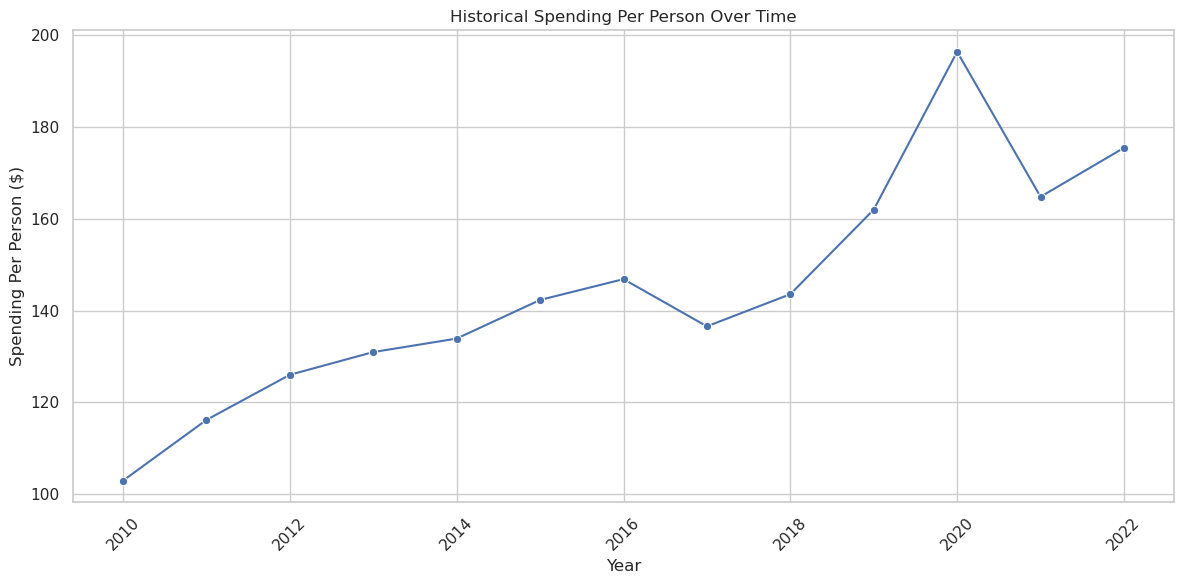

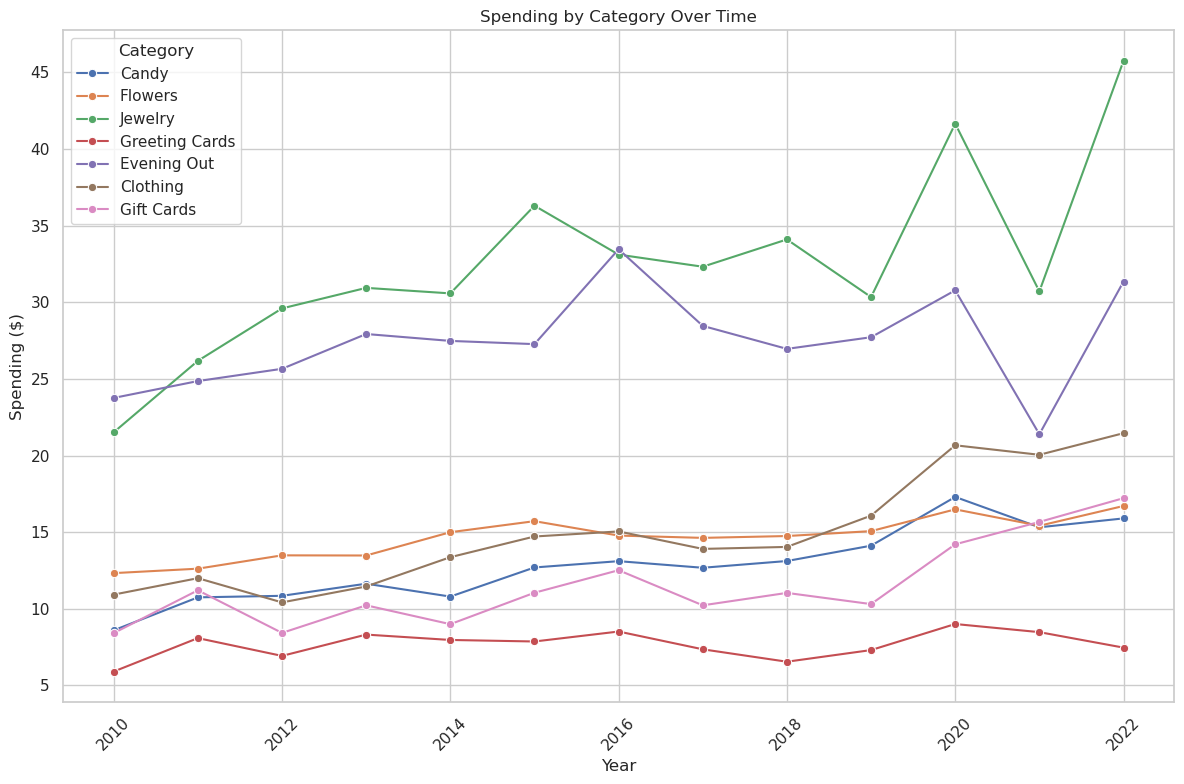

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Plot overall spending per person over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=historical_spending, x='Year', y='PerPerson', marker='o')
plt.title('Historical Spending Per Person Over Time')
plt.xlabel('Year')
plt.ylabel('Spending Per Person ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot spending in different categories over the years
plt.figure(figsize=(12, 8))
sns.lineplot(data=historical_spending, x='Year', y='Candy', marker='o', label='Candy')
sns.lineplot(data=historical_spending, x='Year', y='Flowers', marker='o', label='Flowers')
sns.lineplot(data=historical_spending, x='Year', y='Jewelry', marker='o', label='Jewelry')
sns.lineplot(data=historical_spending, x='Year', y='GreetingCards', marker='o', label='Greeting Cards')
sns.lineplot(data=historical_spending, x='Year', y='EveningOut', marker='o', label='Evening Out')
sns.lineplot(data=historical_spending, x='Year', y='Clothing', marker='o', label='Clothing')
sns.lineplot(data=historical_spending, x='Year', y='GiftCards', marker='o', label='Gift Cards')

plt.title('Spending by Category Over Time')
plt.xlabel('Year')
plt.ylabel('Spending ($)')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.tight_layout()
plt.show()


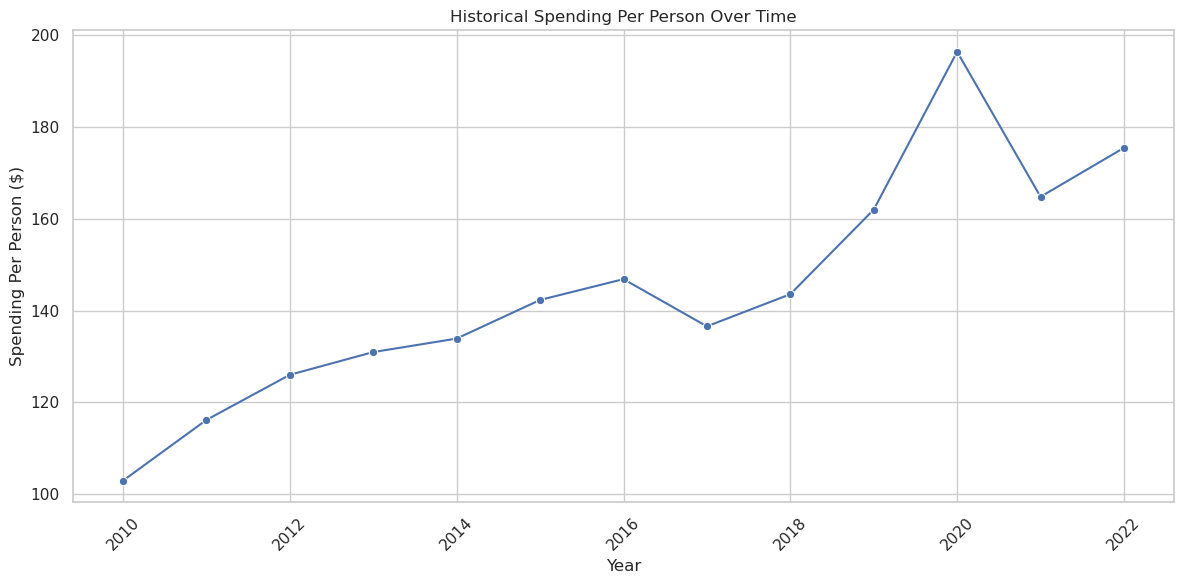

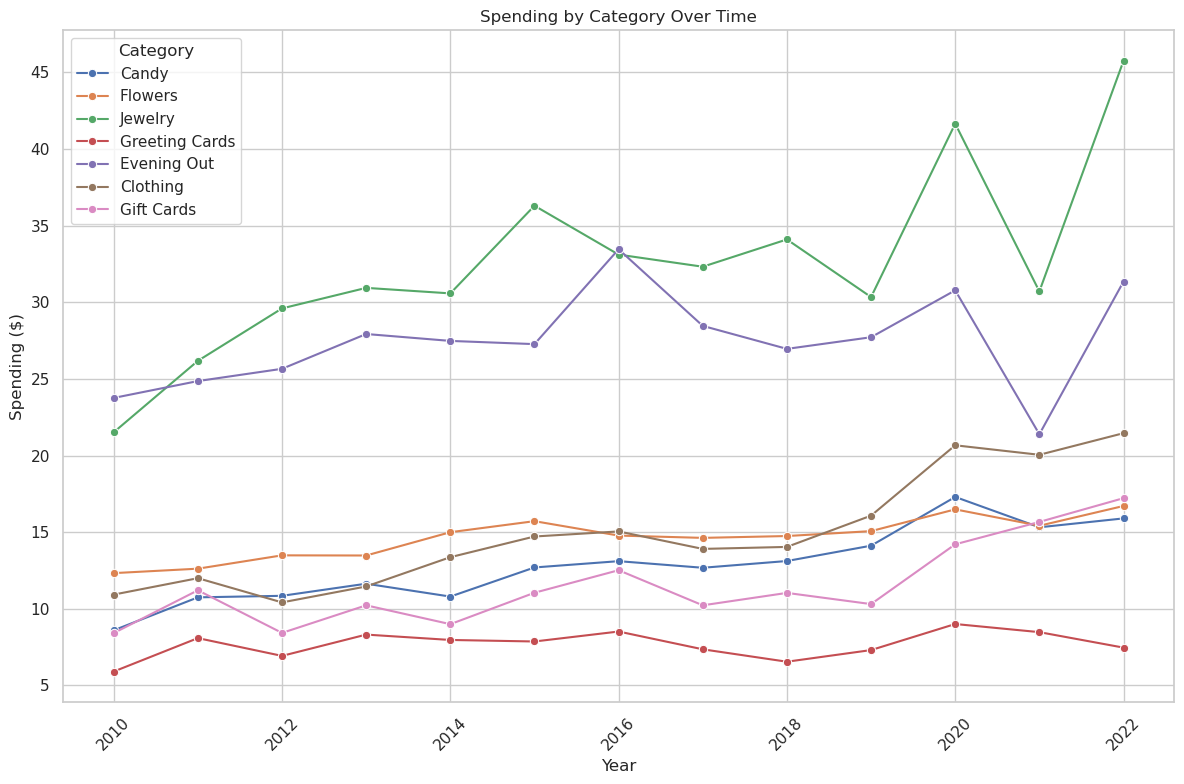

In [21]:
display(Image(filename='historical_spending.png'))
display(Image(filename='spending_by_category.png'))

/tmp/ipykernel_380/2217137547.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




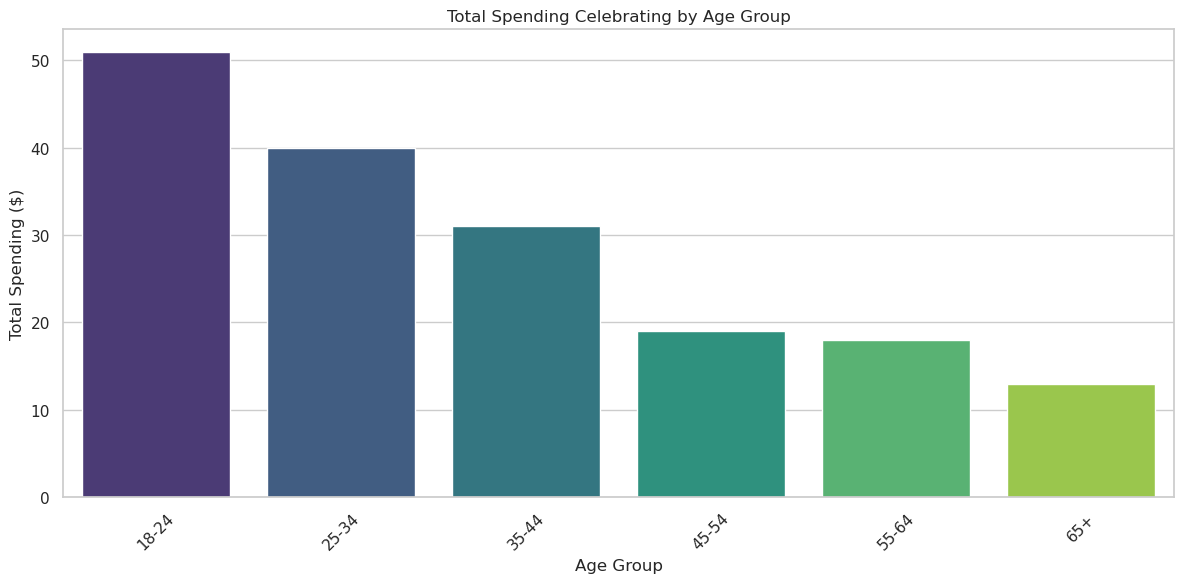

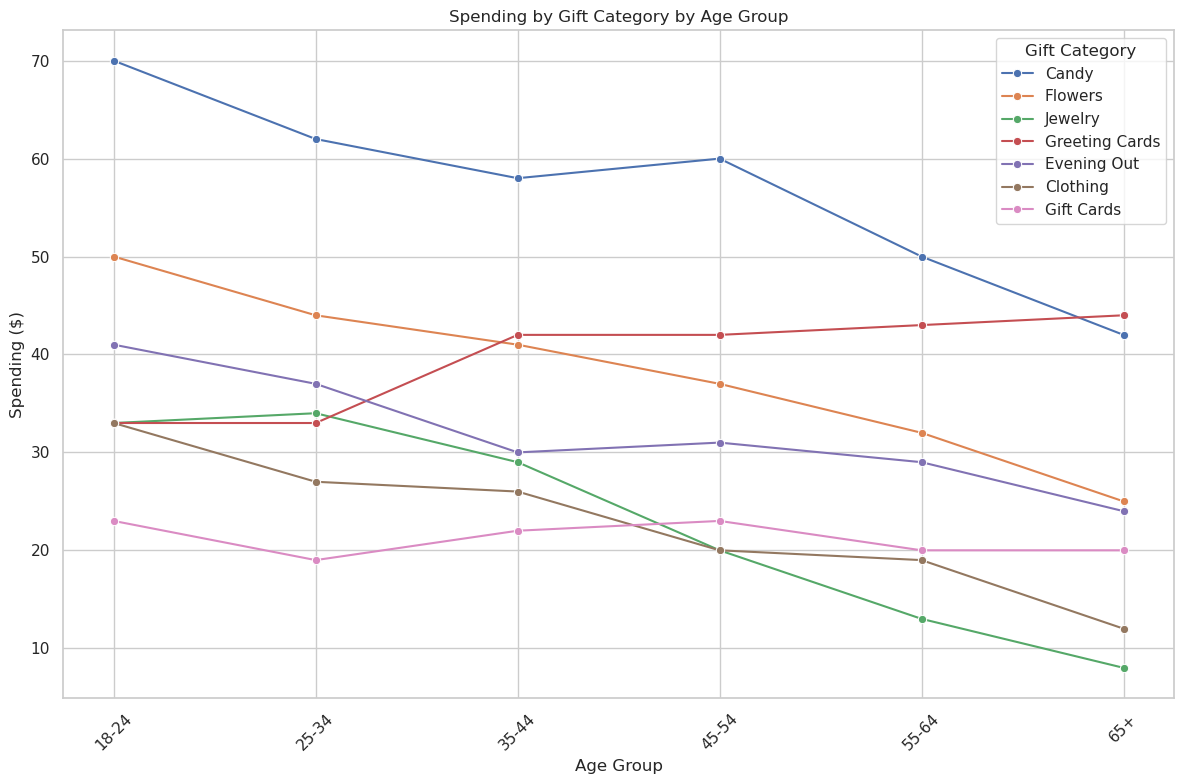

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(data=gifts_age, x='Age', y='SpendingCelebrating', palette='viridis')
plt.title('Total Spending Celebrating by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Spending ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
sns.lineplot(data=gifts_age, x='Age', y='Candy', marker='o', label='Candy')
sns.lineplot(data=gifts_age, x='Age', y='Flowers', marker='o', label='Flowers')
sns.lineplot(data=gifts_age, x='Age', y='Jewelry', marker='o', label='Jewelry')
sns.lineplot(data=gifts_age, x='Age', y='GreetingCards', marker='o', label='Greeting Cards')
sns.lineplot(data=gifts_age, x='Age', y='EveningOut', marker='o', label='Evening Out')
sns.lineplot(data=gifts_age, x='Age', y='Clothing', marker='o', label='Clothing')
sns.lineplot(data=gifts_age, x='Age', y='GiftCards', marker='o', label='Gift Cards')

plt.title('Spending by Gift Category by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Spending ($)')
plt.xticks(rotation=45)
plt.legend(title='Gift Category')
plt.tight_layout()
plt.show()

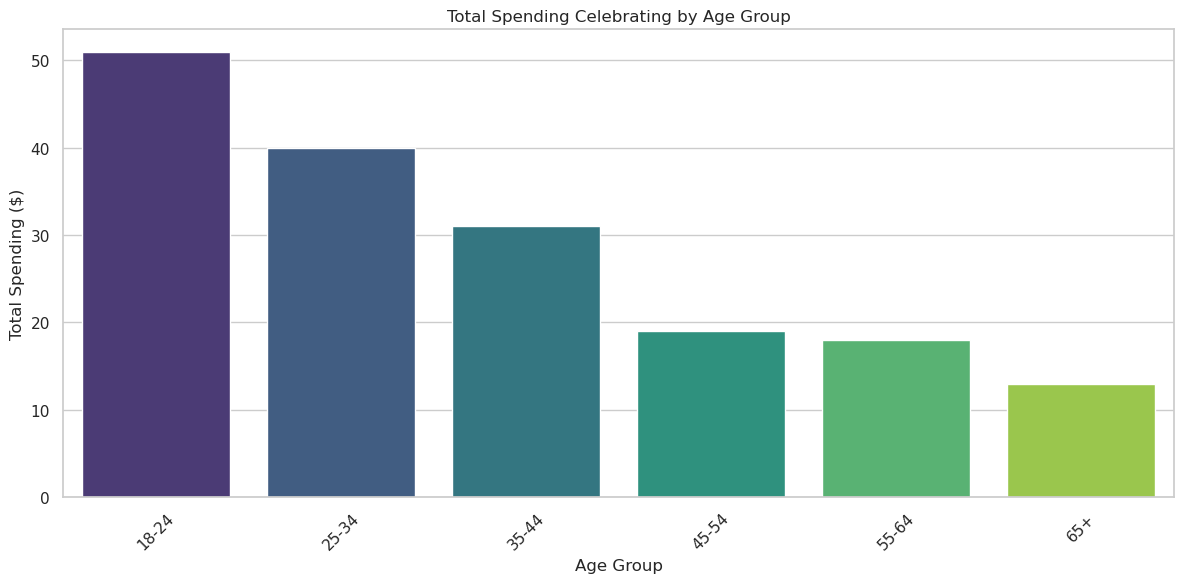

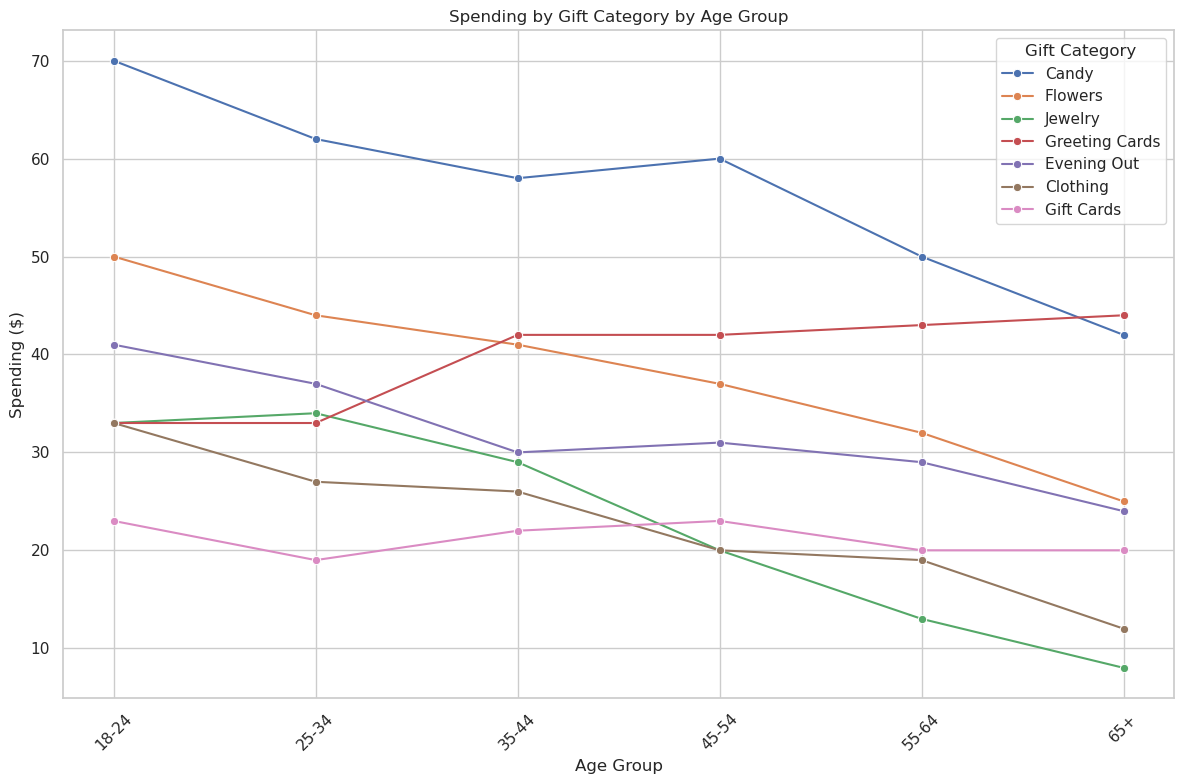

In [23]:
display(Image(filename='age_2.png'))
display(Image(filename='age_1.png'))

/tmp/ipykernel_380/2052529376.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




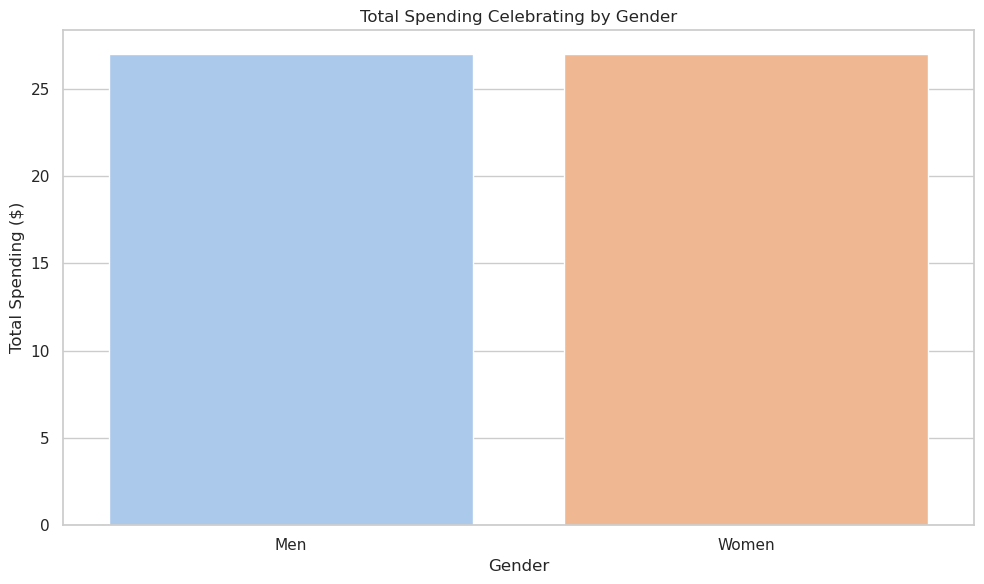

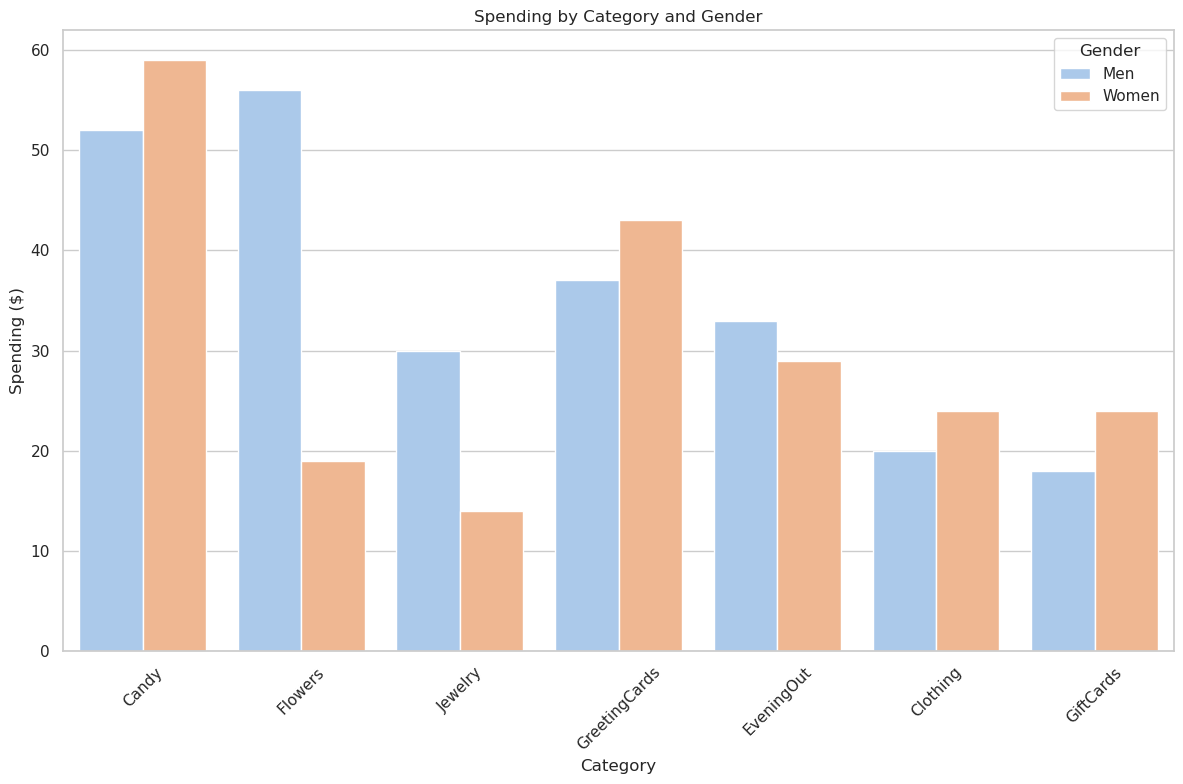

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(data=gifts_gender, x='Gender', y='SpendingCelebrating', palette='pastel')
plt.title('Total Spending Celebrating by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Spending ($)')
plt.tight_layout()

plt.show()  # Show the plot

# Plot spending in different categories by gender
categories = ['Candy', 'Flowers', 'Jewelry', 'GreetingCards', 'EveningOut', 'Clothing', 'GiftCards']

# Melt the dataframe for easier plotting
gifts_gender_melted = gifts_gender.melt(id_vars='Gender', value_vars=categories, var_name='Category', value_name='Spending')

# Plot spending by category for each gender
plt.figure(figsize=(12, 8))
sns.barplot(data=gifts_gender_melted, x='Category', y='Spending', hue='Gender', palette='pastel')
plt.title('Spending by Category and Gender')
plt.xlabel('Category')
plt.ylabel('Spending ($)')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

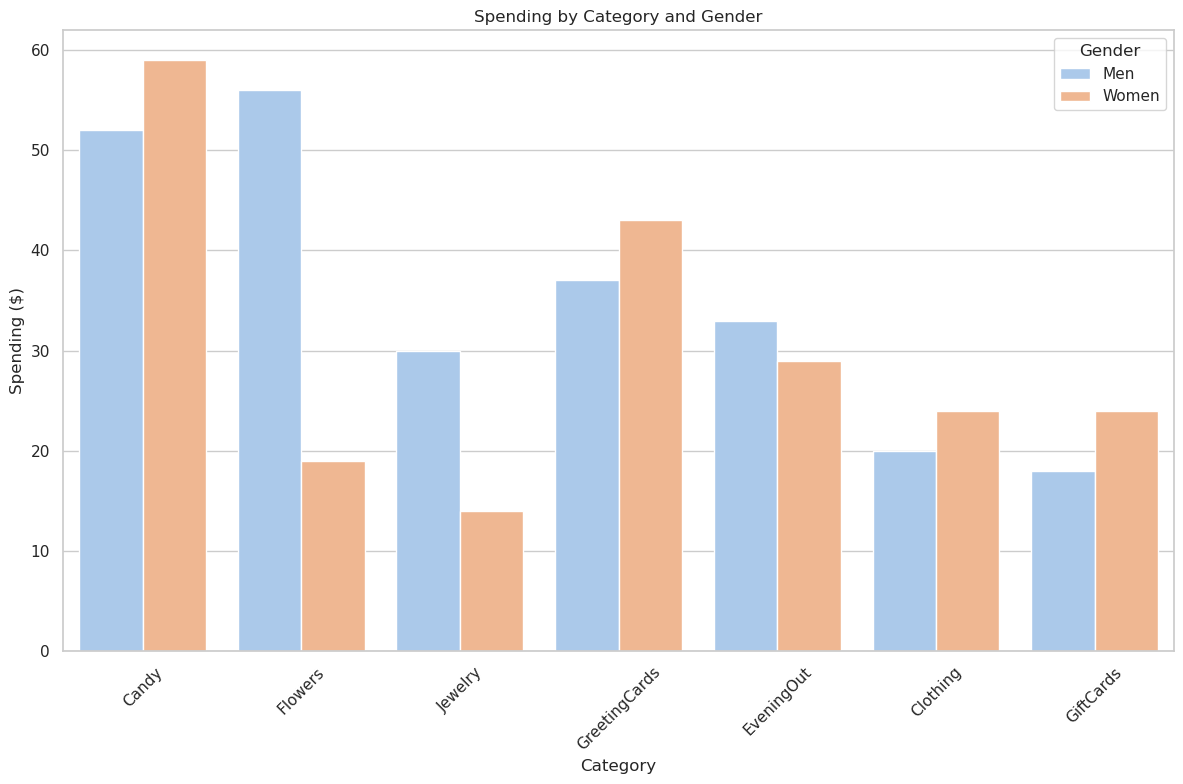

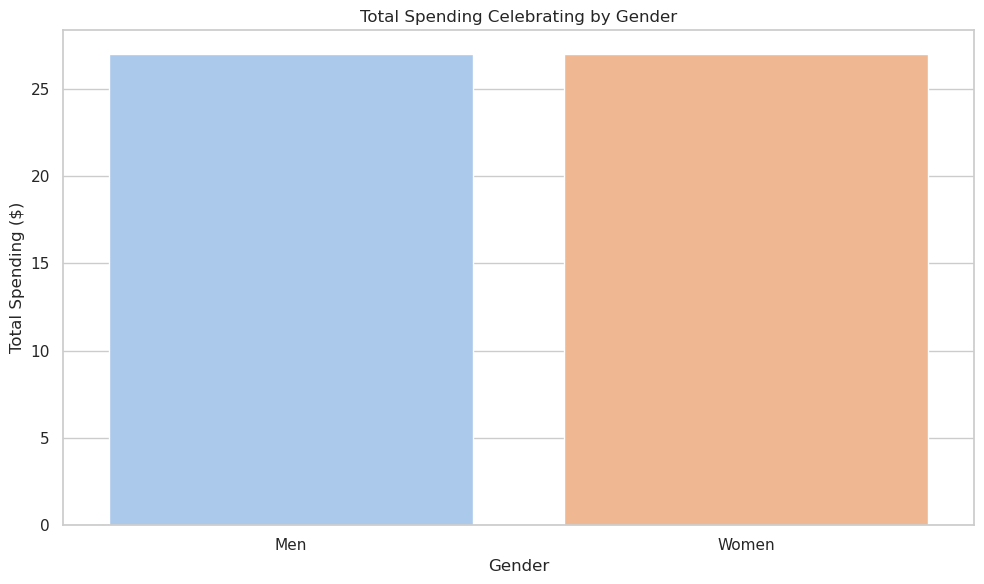

In [25]:
display(Image(filename='gender_1.png'))
display(Image(filename='gender_2.png'))

## Step7: Interpret Results

Historical trend: The historical spending trends reveal a general increase in spending per person over time. The proportion of spending across different categories remains relatively stable, with jewelry and evening out consistently representing the largest shares. A key factor influencing consumer behavior is the COVID-19 pandemic. The line graph highlights 2020 as a notable turning point, where spending dropped sharply following the onset of the pandemic. Over time, spending gradually recovered, eventually returning to pre-pandemic levels.

Age trend: The graph of total spending by different age groups indicates a clear trend: spending decreases as age increases, suggesting that consumer behavior and celebration patterns are skewing toward younger demographics. This may be due to younger individuals placing greater importance on special occasions like Valentine’s Day, viewing it as an opportunity to celebrate milestones in their relationships. As a result, the 18-24 age group has emerged as a key target demographic for marketing strategies. To effectively engage this audience, marketers should consider leveraging trendy platforms such as TikTok and Instagram, utilizing campaigns that resonate with their lifestyle and preferences.

Gender trend: Men and women generally spend comparable amounts on Valentine’s Day gifts. However, when broken down by category, subtle differences in consumer behavior emerge. Women tend to prefer purchasing candies, greeting cards, and clothing, while men show a stronger inclination toward buying flowers, jewelry, and evening outings. Notably, men exhibit a significantly higher preference for flowers and jewelry compared to women. This divergence may stem from traditional gender roles and societal expectations surrounding Valentine's Day. 

# Question 7

In [26]:
import plotly.express as px
df = px.data.gapminder()
px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

In [27]:
import plotly.express as px

df = px.data.gapminder()

fig = px.bar(df, x="continent", y="pop", color="continent",
  animation_frame="year", animation_group="country", range_y=[0,4000000000])
fig.show()

# Question 8

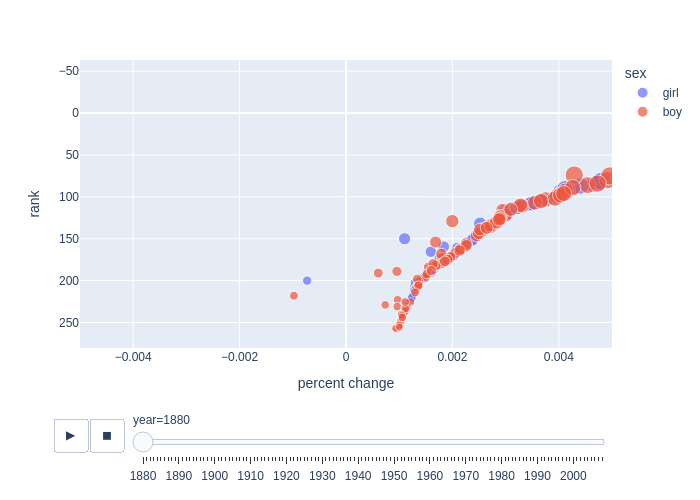

In [28]:
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')
bn['name'] = bn['name']+" "+bn['sex'] # make identical boy and girl names distinct
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)
bn = bn.sort_values(['name','year'])
# the next three lines create the increaes or decrease in name prevalence from the last year 
bn['percent change'] = bn['percent'].diff()
new_name = [True]+list(bn.name[:-1].values!=bn.name[1:].values)
bn.loc[new_name,'percentage change'] = bn.loc[new_name,'percent'] 
bn = bn.sort_values('year')
bn = bn[bn.percent>0.001] # restrict to "common" names
fig = px.scatter(bn, x="percent change", y="rank", animation_frame="year", animation_group="name",
                 size="percent", color="sex", hover_name="name",size_max=50, range_x=[-0.005,0.005]) # range_y removed
fig.update_yaxes(autorange='reversed') # this lets us put rank 1 on the top
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

# Question 9

Yes